# Titanic ML problem

## Importing the relevent libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

sns.set()

## Loading the data

In [14]:
# Loading the training data
train_data = pd.read_csv('train.csv')
# Loading the testing data
test_data = pd.read_csv('test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Visualizating the data

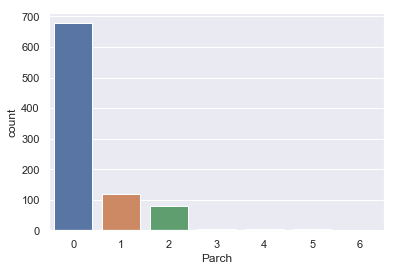

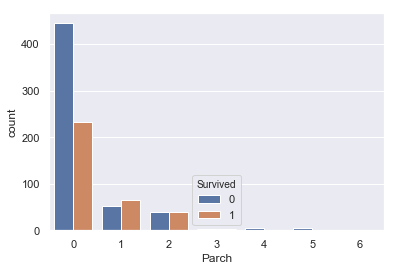

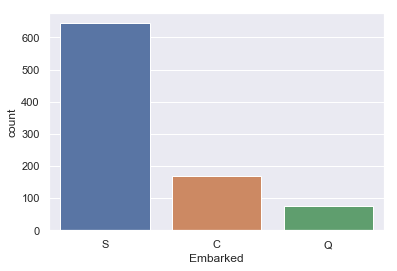

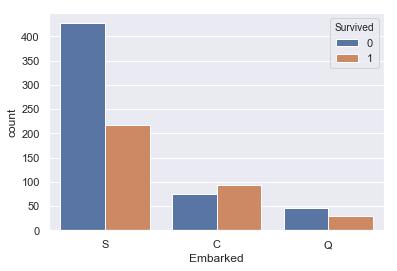

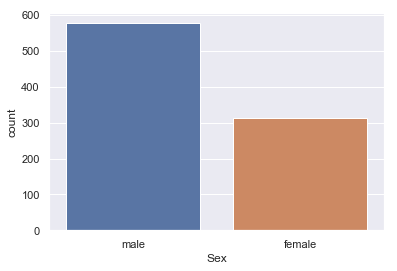

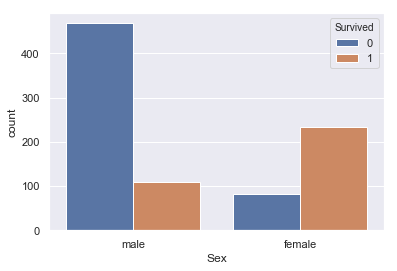

In [54]:
sns.countplot('Parch', data=train_data)
plt.show()
sns.countplot('Parch', hue = 'Survived', data=train_data)
plt.show()
sns.countplot('Embarked', data=train_data)
plt.show()
sns.countplot('Embarked', hue = 'Survived',data=train_data)
plt.show()
sns.countplot('Sex',data=train_data)
plt.show()
sns.countplot('Sex', hue='Survived' ,data=train_data)
plt.show()

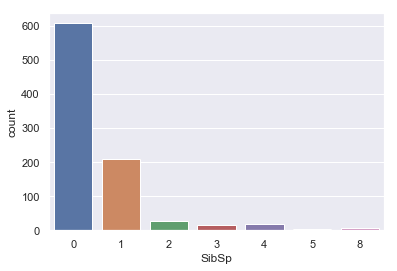

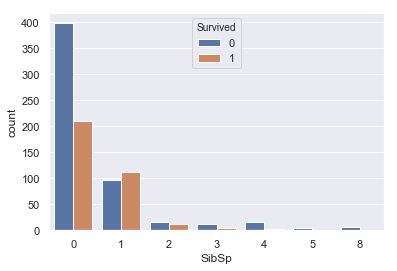

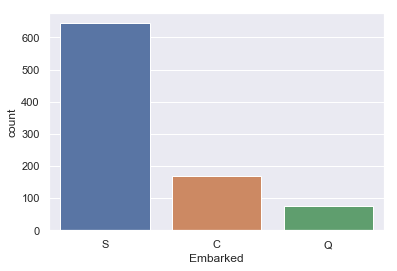

AttributeError: Unknown property sue

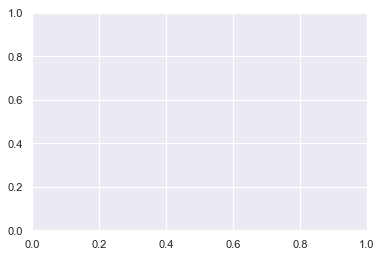

In [55]:
sns.countplot('SibSp', data=train_data)
plt.show()
sns.countplot('SibSp', hue = 'Survived',data=train_data)
plt.show()
sns.countplot('Embarked', data = train_data)
plt.show()
sns.countplot('Embarked', sue = 'Survived', data = train_data)
plt.show()
sns.countplot('Sex', hue='Survived', data=train_data)
plt.show()

In [56]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')
pd.crosstab([train_data.Parch,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')
pd.crosstab([train_data.Fare,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')
pd.crosstab([train_data.SibSp,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex',data = train_data)
sns.factorplot('Parch', 'Survived', hue = 'Sex',data = train_data)
sns.factorplot('SibSp', 'Survived', hue = 'Sex',data = train_data)

## Data Preprocessing

In [ ]:
# Mapping Sex column, male = 1 and female = 0
# train_data['Sex'] = train_data['Sex'].map({'male': 1,'female': 0})
# test_data['Sex'] = test_data['Sex'].map({'male': 1,'female': 0})

In [3]:
# Dealing with missing age values
# Extracting the title before the name and filling the age accordingly
train_data['Initial'] = 0
for i in train_data:
    train_data['Initial'] = train_data.Name.str.extract('([A-Za-z]+)\.')

test_data['Initial'] = 0
for i in test_data:
    test_data['Initial'] = test_data.Name.str.extract('([A-Za-z]+)\.')

In [4]:
train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Sir','Capt','Nobal','Nobal','Nobal','Capt','Sir','Capt','Sir','Nobal'],inplace=True)
test_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Sir','Capt','Nobal','Nobal','Nobal','Capt','Sir','Capt','Sir','Nobal','Nobal'],inplace=True)

In [80]:
pd.crosstab(train_data.Initial,train_data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Master,Miss,Mr,Mrs,Nobal,Sir
Sex,,,,,,,
female,0,0,186,0,125,2,1
male,5,40,0,517,0,2,13


In [81]:
pd.crosstab(test_data.Initial,test_data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Master,Miss,Mr,Mrs,Nobal,Sir
Sex,,,,,,,
female,0,0,79,0,72,1,0
male,2,21,0,240,0,0,3


In [5]:
# Replacing the titles with approproate age in the dataset
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Sir'),'Age']=43
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Nobal'),'Age']=40
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Capt'),'Age']=57
print(test_data.Age.isnull().any())
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mr'),'Age']=33
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mrs'),'Age']=36
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Master'),'Age']=5
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Miss'),'Age']=22
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Sir'),'Age']=43
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Nobal'),'Age']=40
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Capt'),'Age']=57
print(test_data.Age.isnull().any())

True
False


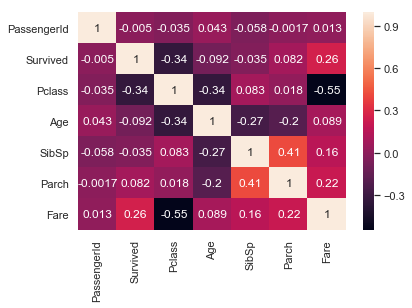

In [83]:
sns.heatmap(train_data.corr() , annot = True)

In [6]:
# Filling the remaining values on 'Embarked' on training data
train_data['Embarked'] = train_data['Embarked'].fillna('S')

# Filling the remaining values on 'Embarked' on testing data
test_data['Embarked'] = test_data['Embarked'].fillna('S')

In [7]:
# Dividing 'Age' variable into different categories

train_data['Age_band'] = 0
train_data.loc[train_data['Age'] <= 11, 'Age_band'] = 0
train_data.loc[(train_data['Age'] > 11) & (train_data['Age'] <= 18), 'Age_band'] = 1
train_data.loc[(train_data['Age'] > 18) & (train_data['Age'] <= 22), 'Age_band'] = 2
train_data.loc[(train_data['Age'] > 22) & (train_data['Age'] <= 27), 'Age_band'] = 3
train_data.loc[(train_data['Age'] > 27) & (train_data['Age'] <= 33), 'Age_band'] = 4
train_data.loc[(train_data['Age'] > 33) & (train_data['Age'] <= 40), 'Age_band'] = 5
train_data.loc[(train_data['Age'] > 40) & (train_data['Age'] <= 66), 'Age_band'] = 6
train_data.loc[ train_data['Age'] > 66, 'Age_band'] = 6


test_data['Age_band'] = 0
test_data.loc[ test_data['Age'] <= 11, 'Age_band'] = 0
test_data.loc[(test_data['Age'] > 11) & (test_data['Age'] <= 18), 'Age_band'] = 1
test_data.loc[(test_data['Age'] > 18) & (test_data['Age'] <= 22), 'Age_band'] = 2
test_data.loc[(test_data['Age'] > 22) & (test_data['Age'] <= 27), 'Age_band'] = 3
test_data.loc[(test_data['Age'] > 27) & (test_data['Age'] <= 33), 'Age_band'] = 4
test_data.loc[(test_data['Age'] > 33) & (test_data['Age'] <= 40), 'Age_band'] = 5
test_data.loc[(test_data['Age'] > 40) & (test_data['Age'] <= 66), 'Age_band'] = 6
test_data.loc[ test_data['Age'] > 66, 'Age_band'] = 6
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
train_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Initial        891 non-null object
Age_band       891 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 97.5+ KB


In [8]:
# Dividing 'Fare' in to various categories
train_data['Fare_cat']=0
train_data.loc[train_data['Fare']<=7.91,'Fare_cat']=0
train_data.loc[(train_data['Fare']>7.91)&(train_data['Fare']<=14.454),'Fare_cat']=1
train_data.loc[(train_data['Fare']>14.454)&(train_data['Fare']<=31),'Fare_cat']=2
train_data.loc[(train_data['Fare']>31)&(train_data['Fare']<=513),'Fare_cat']=3

test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
test_data['Fare_cat']=0
test_data.loc[test_data['Fare']<=7.91,'Fare_cat']=0
test_data.loc[(test_data['Fare']>7.91)&(test_data['Fare']<=14.454),'Fare_cat']=1
test_data.loc[(test_data['Fare']>14.454)&(test_data['Fare']<=31),'Fare_cat']=2
test_data.loc[(test_data['Fare']>31)&(test_data['Fare']<=513),'Fare_cat']=3

In [87]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Initial        891 non-null object
Age_band       891 non-null int64
Fare_cat       891 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null

In [9]:
train_x = train_data[['Pclass','Sex','Age_band','Parch','SibSp','Embarked','Fare_cat']]
train_y = train_data['Survived']
test_x = test_data[['Pclass','Sex','Age_band','Parch','SibSp','Embarked','Fare_cat']]
#test_y = test_data['Survived']


In [10]:
train_x_encoded = pd.get_dummies(train_x)
test_x_encoded = pd.get_dummies(test_x)
preprocessing.scale(train_x_encoded)
preprocessing.scale(test_x_encoded)
print(train_x_encoded)
print(test_x_encoded)

C:\Users\RISHABH HP\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


     Pclass  Age_band  Parch  SibSp  Fare_cat  Sex_female  Sex_male  \
0         3         2      0      1         0           0         1   
1         1         5      0      1         3           1         0   
2         3         3      0      0         1           1         0   
3         1         5      0      1         3           1         0   
4         3         5      0      0         1           0         1   
5         3         4      0      0         1           0         1   
6         1         6      0      0         3           0         1   
7         3         0      1      3         2           0         1   
8         3         3      2      0         1           1         0   
9         2         1      0      1         2           1         0   
10        3         0      1      1         2           1         0   
11        1         6      0      0         2           1         0   
12        3         2      0      0         1           0         1   
13    

C:\Users\RISHABH HP\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


In [90]:
train_x_encoded

,Pclass,Age_band,Parch,SibSp,Fare_cat,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,2,0,1,0,0,1,0,0,1
1,1,5,0,1,3,1,0,1,0,0
2,3,3,0,0,1,1,0,0,0,1
3,1,5,0,1,3,1,0,0,0,1
4,3,5,0,0,1,0,1,0,0,1
5,3,4,0,0,1,0,1,0,1,0
6,1,6,0,0,3,0,1,0,0,1
7,3,0,1,3,2,0,1,0,0,1
8,3,3,2,0,1,1,0,0,0,1
9,2,1,0,1,2,1,0,1,0,0


In [74]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(train_x_encoded, train_y)

Y_prediction = random_forest.predict(test_x_encoded)

submission = pd.DataFrame({"PassengerId":test_data["PassengerId"],
                           "Survived":Y_prediction})
submission.to_csv("Random_Forest1.csv", index=False)

In [91]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x_encoded, train_y)

Y_pred = decision_tree.predict(test_x_encoded)
submission = pd.DataFrame({'PassengerId':test_data['PassengerId'],
                           'Survived':Y_pred
                          })
submission.to_csv('DecisionTree.csv', index = False)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, x_train, y_train, cv=3)
submission = pd.DataFrame({'PassengerId':y_test,
                           'Survived':Y_pred
                          })
submission.to_csv('oneMOreSubmission.csv', index = False)

In [92]:
from sklearn import svm
C = 0.7
clf = svm.SVC(kernel='linear',C=C).fit(train_x_encoded,train_y)
prediction = clf.predict(test_x_encoded)
submission = pd.DataFrame({"PassengerId":test_data["PassengerId"],
                           "Survived":prediction})
submission.to_csv("svm_result.csv", index=False)

In [11]:
#Import Library
from sklearn.linear_model import LogisticRegression

#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets and check score
model.fit(train_x_encoded, train_y)
model.score(train_x_encoded, train_y)

#Predict Output
predicted= model.predict(test_x_encoded)
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_prediction
    })
submission.to_csv('LogisticRegression.csv', index=False)

C:\Users\RISHABH HP\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


NameError: name 'Y_prediction' is not defined

In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import pandas as pd

#my_model = XGBRegressor(n_estimators=1000)
#my_model.fit(train_x_encoded, train_y, early_stopping_rounds=5, 
#             eval_set=[(test_x_encoded, test_y)], verbose=False)

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_x_encoded, train_y)#, early_stopping_rounds=5, 
             #eval_set=[(test_x_encoded, test_y)], verbose=False)

predictions = my_model.predict(test_x_encoded)
prediction_y = [int(round(value)) for value in predictions]
submission = pd.DataFrame({"PassengerId":test_data["PassengerId"],
                           "Survived":prediction_y})
submission.to_csv("xgboost_result.csv", index=False)
prediction_y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,


In [ ]:
train_data = lgb.Dataset(data, label=label)
test_data = train_data.create_valid('test.svm')

param = {'num_leaves':31, 'num_trees':100, 'objective':'binary'}
param['metric'] = 'auc'

num_round = 10
bst = lgb.train(param, train_data, num_round, valid_sets=[test_data])

bst.save_model('model.txt')

# 7 entities, each contains 10 features
data = np.random.rand(7, 10)
ypred = bst.predict(data)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
melbourne_model = DecisionTreeRegressor(random_state = 1)
melbourne_model.fit(x_train,y_train)

In [20]:
from __future__ import division
import pandas as pd
from sklearn import svm
C = 0.7
##preprocessing.scale(titanic)
##preprocessing.scale(titanic_test)
clf = svm.SVC(kernel='linear',C=C).fit(train_x_encoded,train_y)
prediction = clf.predict(test_x_encoded)
prediction_y = [round(value) for value in prediction]
submission = pd.DataFrame({"PassengerId":test_data["PassengerId"],
                           "Survived":prediction_y})
submission.to_csv("titanic_result.csv", index=False)